In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import cv2
import sys
sys.path.append("..")
from utils.utils import trans_cutout
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [2]:
def get_immediate_subdirectories(a_dir):
    return [name for name in os.listdir(a_dir)
            if os.path.isdir(os.path.join(a_dir, name))]
pardir = "../data/semifield-cutouts/"

cutout_dirs = sorted(get_immediate_subdirectories(pardir))
cutout_csvs =  sorted([x.stem for x in Path("/home/psa_images/SemiF-AnnotationPipeline/data/semifield-cutouts").rglob("*.csv")])


In [16]:
batch_id = "TX_2023-03-17"
df = pd.read_csv(f"../data/semifield-cutouts/{batch_id}/{batch_id}.csv")

df["state_id"] = df.batch_id.str.split("_", expand=False).str[0]
df["date"] = df.batch_id.str.split("_", expand=False).str[1]
df["common_name"] = np.where(df.common_name == "Common lambsquarters", "Lambsquarter", df.common_name)
df["temp_path"] = "../data/semifield-cutouts/" + df["cutout_path"]

In [17]:
features = [
    "blob_home", "image_id", "cutout_num", "datetime", "cutout_id",
    "is_primary", "extends_border", "r_count", "r_mean", "r_std", "r_min",
    "r_25%", "r_50%", "r_75%", "r_max", "r_variance", "r_skewness",
    "r_kurtosis", "g_count", "g_mean", "g_std", "g_min", "g_25%", "g_50%",
    "g_75%", "g_max", "g_variance", "g_skewness", "g_kurtosis", "b_count",
    "b_mean", "b_std", "b_min", "b_25%", "b_50%", "b_75%", "b_max",
    "b_variance", "b_skewness", "b_kurtosis", "area", "common_name",
    "growth_habit", "duration", "category", "hex", "r", "g", "b", "area_bbox",
    "area_convex", "axis_major_length", "axis_minor_length", "centroid0",
    "centroid1", "eccentricity", "solidity", "perimeter",
    "green_sum", "blur_effect", "num_components", "state_id"
]


In [18]:
named_featdata = df.loc[:, features]
multfeatdf = named_featdata.groupby(["common_name"]).describe().reset_index()#names=["common_name"])
multfeatdf = multfeatdf[multfeatdf["common_name"]!="colorchecker"]
# print(multfeatdf)
# savedir = "/home/weedsci/matt/SemiF-AnnotationPipeline/assets"
# multfeatdf.to_csv(f"{savedir}/describe_all_cutouts.csv", index=False)
multfeatdf
multfeatdf.columns = multfeatdf.columns.to_flat_index()
multfeatdf.columns = ['_'.join(x) for x in multfeatdf.columns.get_level_values(0)]


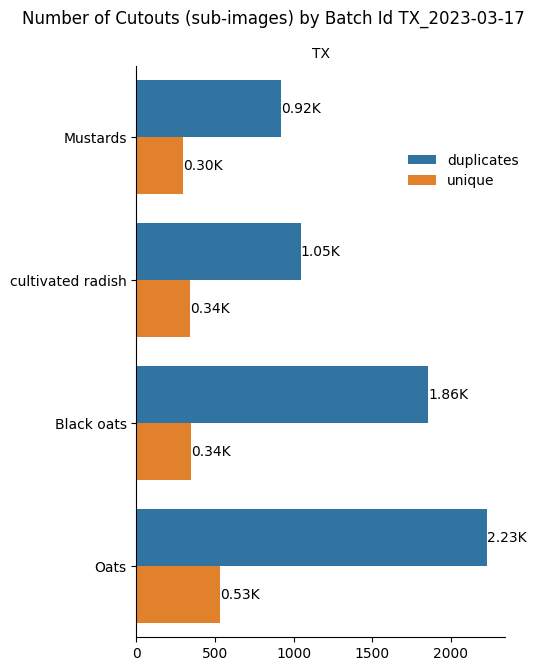

In [19]:
# batch = "TX_2023-01-13"
c = df.groupby(["common_name", "state_id", "is_primary"]).cutout_id.count().reset_index().sort_values("cutout_id")
c = c[c["common_name"]!="colorchecker"]
g = sns.catplot(
    data=c,
    x="cutout_id",
    y="common_name",
    hue="is_primary",
    orient="horizontal",
    col="state_id",
    sharey=False,
    kind="bar",
    aspect=.8,
    height=7
)
g.set(xlabel="", ylabel="")
g.set_titles(col_template="{col_name}")
g._legend.set_title("")
# replace labels
new_labels = ['duplicates', 'unique']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

sns.move_legend(g, "center right", bbox_to_anchor=(.9, .75), frameon=False)

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_width() / 1000):.2f}K' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle(f'Number of Cutouts (sub-images) by Batch Id {batch_id}')
g.savefig(f"../assets/Cutouts_for_batch{batch_id}.png", dpi=300)

Text(0.5, 0.98, 'Mean cutout pixel area by species')

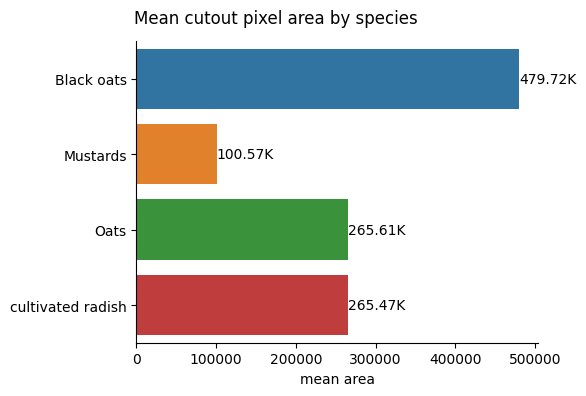

In [20]:
g = sns.catplot(
    data=multfeatdf, x="area_mean", y="common_name_",height=4, aspect=1.5,
    kind="bar")

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_width() / 1000):.2f}K' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

g.set(xlabel="mean area", ylabel="")
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Mean cutout pixel area by species')

Text(0.5, 0.98, 'Mean bbox area of cutouts by species')

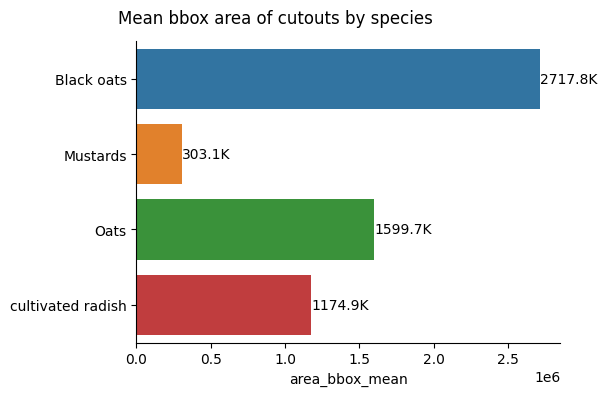

In [21]:
g = sns.catplot(
    data=multfeatdf, x="area_bbox_mean", y="common_name_",height=4, aspect=1.5,
    kind="bar")

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_width()/ 1000):.1f}K' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')


g.set(xlabel="area_bbox_mean", ylabel="")
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Mean bbox area of cutouts by species')

Text(0.5, 0.98, 'Mean "greeness" of cutouts by species')

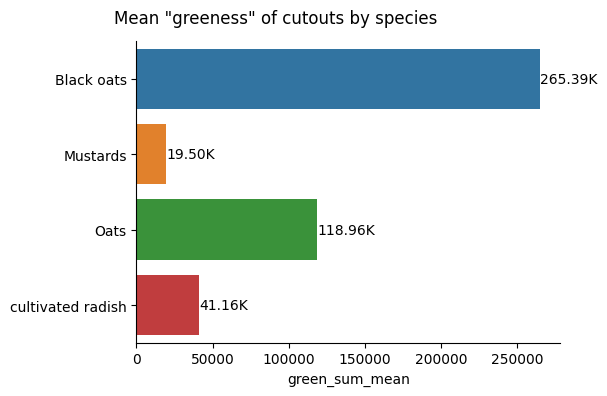

In [22]:

g = sns.catplot(
    data=multfeatdf, x="green_sum_mean", y="common_name_",height=4, aspect=1.5,
    kind="bar")
# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]
# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_width() / 1000):.2f}K' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
    
g.set(xlabel="green_sum_mean", ylabel="")
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Mean "greeness" of cutouts by species')

Text(0.5, 0.98, 'Mean blur effect of cutouts by species \n(0 for no blur, 1 for maximal blur).')

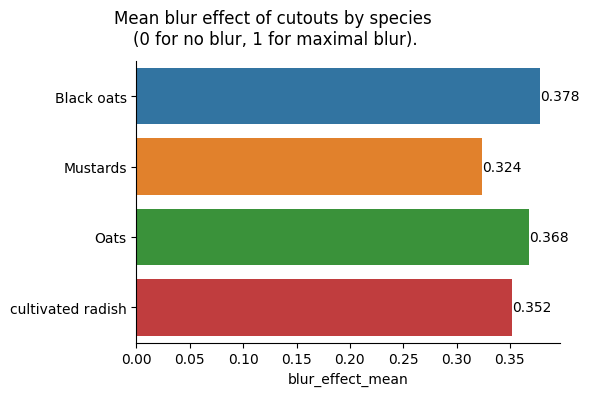

In [23]:

g = sns.catplot(
    data=multfeatdf, x="blur_effect_mean", y="common_name_",height=4, aspect=1.5,
    kind="bar")

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_width()):.3f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

g.set(xlabel="blur_effect_mean", ylabel="")
g.fig.subplots_adjust(top=0.85) # adjust the Figure in rp
g.fig.suptitle('Mean blur effect of cutouts by species \n(0 for no blur, 1 for maximal blur).')

Text(0.5, 0.98, 'Mean number of components or parts of cutouts by species')

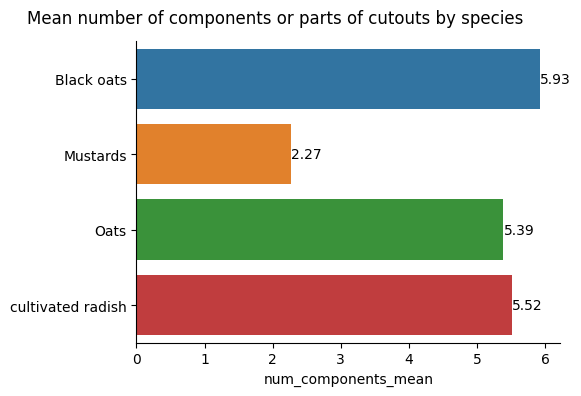

In [24]:
g = sns.catplot(
    data=multfeatdf, x="num_components_mean", y="common_name_",height=4, aspect=1.5,
    kind="bar")
# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_width()):.2f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

g.set(xlabel="num_components_mean", ylabel="")
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Mean number of components or parts of cutouts by species')

Text(0.5, 0.98, 'Mean solidity of cutouts by species\n(Solidity is the ratio of pixels in the objects\n to pixels of the convex hull image.\n It gives a measure of the compactness of the object.)')

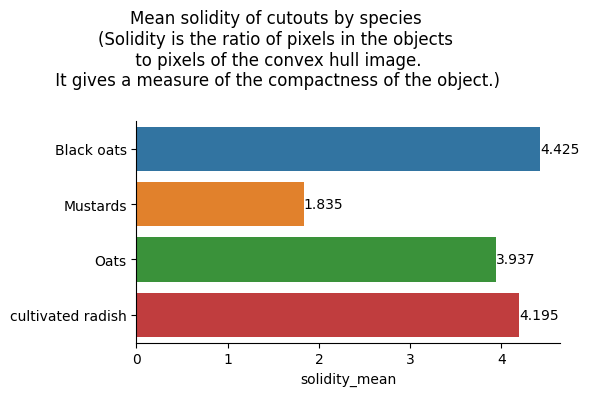

In [25]:
g = sns.catplot(
    data=multfeatdf, x="solidity_mean", y="common_name_",height=4, aspect=1.5,
    kind="bar")

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_width()):.3f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

g.set(xlabel="solidity_mean", ylabel="")
g.fig.subplots_adjust(top=0.7) # adjust the Figure in rp
g.fig.suptitle('Mean solidity of cutouts by species\n(Solidity is the ratio of pixels in the objects\n to pixels of the convex hull image.\n It gives a measure of the compactness of the object.)')

In [26]:
df.columns

Index(['blob_home', 'data_root', 'season', 'batch_id', 'image_id',
       'cutout_num', 'datetime', 'shape', 'cutout_id', 'cutout_path',
       'is_primary', 'extends_border', 'cutout_version', 'schema_version',
       'synth', 'r_count', 'r_mean', 'r_std', 'r_min', 'r_25%', 'r_50%',
       'r_75%', 'r_max', 'r_variance', 'r_skewness', 'r_kurtosis', 'g_count',
       'g_mean', 'g_std', 'g_min', 'g_25%', 'g_50%', 'g_75%', 'g_max',
       'g_variance', 'g_skewness', 'g_kurtosis', 'b_count', 'b_mean', 'b_std',
       'b_min', 'b_25%', 'b_50%', 'b_75%', 'b_max', 'b_variance', 'b_skewness',
       'b_kurtosis', 'area', 'class_id', 'USDA_symbol', 'EPPO', 'group',
       'class', 'subclass', 'order', 'family', 'genus', 'species',
       'common_name', 'authority', 'growth_habit', 'duration',
       'collection_location', 'category', 'collection_timing',
       'multi_species_USDA_symbol', 'link', 'note', 'hex', 'r', 'g', 'b',
       'area_bbox', 'area_convex', 'axis_major_length', 'axis_minor

<AxesSubplot: xlabel='common_name', ylabel='area'>

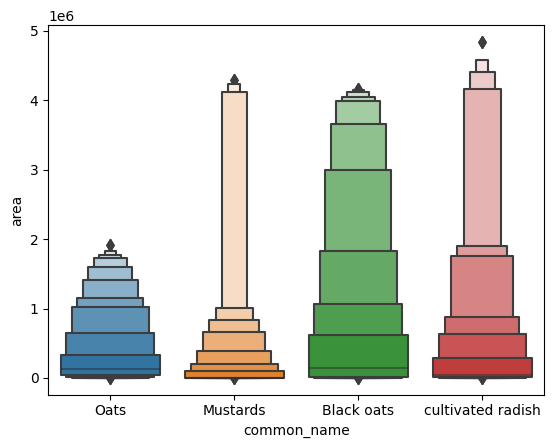

In [27]:
df
# sns.violinplot(data=df[df["common_name"]!="colorchecker"], x="common_name", y="area",scale="count",hue="is_primary", split=True,dodge=True)

# Draw a nested violinplot and split the violins for easier comparison
# sns.violinplot(data=df[df["common_name"]!="colorchecker"], x="common_name", y="area", hue="is_primary",
#                split=True, inner="quart", linewidth=1)
# sns.despine(left=True)

sns.boxenplot(data=df[df["common_name"]!="colorchecker"],x="common_name", y="area",
            #   color="b",
            k_depth="trustworthy",
              scale="linear")